In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.metrics import adjusted_rand_score
import umap
import warnings

In [2]:
# Suppress Warnings that may occur
warnings.simplefilter("ignore", category=(UserWarning, FutureWarning))

In [3]:
# Search for asteroids with a value > $0.1 
# Limit of 1000 as that is the most that can be obtained from a single request
url = "https://www.asterank.com/api/asterank?query={%22e%22:{%22$ne%22:null},%22i%22:{%22$ne%22:null},%22a%22:{%22$ne%22:null},%22price%22:{%22$gt%22:0.1}}&limit=1000"
response = requests.get(url)
data = response.json()
        
# Create a Pandas DataFrame from the list of dictionaries obtained
df = pd.DataFrame(data)

#Display the 10 most valuable asteroids
df[['full_name','price']].sort_values(by='price', ascending=False).head(10)

,full_name,price
995,511 Davida (1903 LU),1.538263e+19
994,334 Chicago (1892 L),6.115258e+18
993,702 Alauda (1910 KQ),5.408989e+18
992,423 Diotima (1896 DB),4.235026e+18
991,372 Palma (1893 AH),4.065526e+18
990,747 Winchester (1913 QZ),3.942294e+18
989,488 Kreusa (1902 JG),3.699961e+18
988,566 Stereoskopia (1905 QO),3.651579e+18
987,2060 Chiron (1977 UB),3.556981e+18
986,386 Siegena (1894 AY),3.498590e+18


In [4]:
# Search for asteroids with a value < $0.1 (These are the asteroids with a value assigned but of very low value)
# Limit of 1000 as that is the most that can be obtained from a single request
url = "https://www.asterank.com/api/asterank?query={%22e%22:{%22$ne%22:null},%22i%22:{%22$ne%22:null},%22a%22:{%22$ne%22:null},%22price%22:{%22$gt%22:1e-100,%22$lt%22:0.1}}&limit=1000"
response = requests.get(url)
data += response.json()
        
# Create a Pandas DataFrame using the combined list of dictionaries obtained
df = pd.DataFrame(data)

In [5]:
df

,sigma_tp,diameter,sigma_q,epoch_mjd,ad,producer,rms,H_sigma,closeness,spec_B,...,spec,q,w,moid_jup,n,sigma_ma,first_obs,n_del_obs_used,spkid,n_dop_obs_used
0,0.000362,,6.423900e-08,58600.0,2.700043,Otto Matic,0.58643,,3971.964615,D,...,D,1.033903,203.060094,2.280280,0.386364,0.000135,2001-12-18,,3102743.0,
1,0.000044,,7.269600e-08,58600.0,1.829700,Otto Matic,0.63948,,3876.796742,D,...,D,0.886638,56.213623,3.392780,0.622692,0.000028,2001-09-27,,3082931.0,
2,1.358400,,1.526400e-05,58600.0,2.870736,Otto Matic,0.47368,,3545.028345,T,...,T,0.954085,97.628145,2.122780,0.372677,0.545600,2001-12-17,,3102706.0,
3,0.391610,,3.532400e-06,58600.0,5.287454,Otto Matic,0.58176,,2807.529413,T,...,T,1.053954,87.553867,0.472989,0.174570,0.069887,2001-10-14,,3092496.0,
4,0.000096,177.774,1.331600e-07,58600.0,3.479834,Otto Matic,0.45086,,2635.143022,T,...,T,2.621945,208.746098,1.583290,0.184954,0.000018,1868-02-20,,2000096.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,0.000123,111.251,6.904900e-08,58600.0,2.373855,Otto Matic,0.42036,,2652.158471,S,...,S,2.160638,269.731621,2.797620,0.288706,0.000036,1864-09-27,,2000040.0,
1790,0.000114,139.77,9.789500e-08,58600.0,3.190289,Otto Matic,0.55520,,2639.205561,R,...,R,2.654931,345.758604,2.264850,0.197264,0.000023,1892-12-11,,2000349.0,
1791,0.000059,148.128,9.015200e-08,58600.0,3.555410,Otto Matic,0.45046,,2641.611806,S,...,S,2.232245,315.136183,1.922010,0.200214,0.000012,1901-05-19,,2000471.0,
1792,0.000074,148.97,5.943200e-08,58600.0,3.117824,Otto Matic,0.56529,,2640.136754,Sl,...,Sl,2.479441,5.562661,1.906030,0.210516,0.000016,1893-02-06,,2000354.0,


In [6]:
# Check for exact duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# Print the number of duplicates
print(f"Number of exact duplicate rows: {len(duplicates)}")

Number of exact duplicate rows: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigma_tp        1794 non-null   float64
 1   diameter        1794 non-null   object 
 2   sigma_q         1794 non-null   float64
 3   epoch_mjd       1794 non-null   float64
 4   ad              1794 non-null   float64
 5   producer        1794 non-null   object 
 6   rms             1794 non-null   float64
 7   H_sigma         1794 non-null   object 
 8   closeness       1794 non-null   float64
 9   spec_B          1794 non-null   object 
 10  K2              1794 non-null   object 
 11  K1              1794 non-null   object 
 12  M1              1794 non-null   object 
 13  two_body        1794 non-null   object 
 14  full_name       1794 non-null   object 
 15  M2              1794 non-null   object 
 16  sigma_per       1794 non-null   float64
 17  equinox         1794 non-null   o

In [8]:
#Display the 10 most valuable asteroids
df[['diameter','est_diameter']].sort_values(by='est_diameter', ascending=False).head(10)

,diameter,est_diameter
117,226,253.158298
1664,,16.424016
1658,,15.684813
1657,,15.541014
1653,,14.978880
1647,,14.304720
1640,,13.660901
461,,13.473467
1629,,13.046059
1628,,13.046059


In [9]:
# Replace empty strings ('') in 'diameter' with the corresponding values in 'est_diameter' removing all Null values
df['diameter'] = df['diameter'].replace('', np.nan)
df['diameter'].fillna(df['est_diameter'], inplace=True)
df['diameter'] = df['diameter'].astype('float64')
df[['diameter','est_diameter']].sort_values(by='est_diameter', ascending=False).head(10)

,diameter,est_diameter
117,226.000000,253.158298
1664,16.424016,16.424016
1658,15.684813,15.684813
1657,15.541014,15.541014
1653,14.978880,14.978880
1647,14.304720,14.304720
1640,13.660901,13.660901
461,13.473467,13.473467
1629,13.046059,13.046059
1628,13.046059,13.046059


In [10]:
df = df.drop('est_diameter', axis=1)

In [11]:
# See what objects have missing values
empty_string_counts = (df == '').sum()
empty_string_counts[empty_string_counts > 0]

H_sigma           1791
spec_B             149
K2                1794
K1                1794
M1                1794
two_body          1794
M2                1794
DT                1794
diameter_sigma     366
albedo             306
PC                1794
A1                1793
A3                1794
A2                1771
rot_per            389
prov_des           257
G                 1689
IR                1793
spec_T            1180
extent            1779
GM                1664
UB                1195
name               287
prefix            1794
BV                1185
n_del_obs_used    1702
n_dop_obs_used    1702
dtype: int64

Only two of the objects which have few (<400) missing values could be worth filling missing values for. These are 'rot_per' and 'albedo' in both cases the median should be used as it is robust to potential outliers unlike the mean which could be distorted.

In [12]:
# Replace empty strings ('') in 'rot_per' and 'albedo' with their median values removing all Null values
df['rot_per'] = df['rot_per'].replace('', np.nan)
df['albedo'] = df['albedo'].replace('', np.nan)
df['rot_per'] = df['rot_per'].astype('float64')
df['albedo'] = df['albedo'].astype('float64')
df['rot_per'] = df['rot_per'].fillna(df['rot_per'].median())
# For 'albedo', replace Null values with the median albedo for the same spectral class
df['albedo'] = df.groupby('spec')['albedo'].transform(lambda x: x.fillna(x.median()))
# Do not have S(IV) albedos but they should be similar to S
df.loc[df['spec'] == 'S(IV)', 'albedo'] = df[df['spec'] == 'S']['albedo'].median()

In [13]:
# See what objects have missing values
empty_string_counts = (df == '').sum()
empty_string_counts[empty_string_counts > 0]

# Identify columns with empty strings
columns_to_remove = empty_string_counts[empty_string_counts > 0].index

# Drop empty string columns from the DataFrame
df = df.drop(columns=columns_to_remove)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sigma_tp        1794 non-null   float64
 1   diameter        1794 non-null   float64
 2   sigma_q         1794 non-null   float64
 3   epoch_mjd       1794 non-null   float64
 4   ad              1794 non-null   float64
 5   producer        1794 non-null   object 
 6   rms             1794 non-null   float64
 7   closeness       1794 non-null   float64
 8   full_name       1794 non-null   object 
 9   sigma_per       1794 non-null   float64
 10  equinox         1794 non-null   object 
 11  saved           1794 non-null   float64
 12  albedo          1794 non-null   float64
 13  moid_ld         1794 non-null   float64
 14  pha             1794 non-null   object 
 15  neo             1794 non-null   object 
 16  sigma_ad        1794 non-null   float64
 17  profit          1794 non-null   f

In [15]:
df['dv'].describe()

count    1537.000000
mean        9.757705
std         1.872706
min         4.251396
25%         8.848524
50%         9.820005
75%        10.503132
max        25.538535
Name: dv, dtype: float64

'dv' is now the only column with null values these will be placed with the median for the same reasons as discussed prior.

In [16]:
df['dv'] = df['dv'].fillna(df['dv'].median())

In [17]:
# Get statistical summary for object columns only
df.describe(include=['object'])

,producer,full_name,equinox,pha,neo,id,orbit_id,last_obs,pdes,class,spec,first_obs
count,1794,1794,1794,1794,1794,1794,1794.0,1794,1794,1794,1794,1794
unique,4,1794,1,2,2,1794,239.0,357,1794,10,28,1534
top,Otto Matic,(2002 AT4),J2000,N,N,bK02A04T,30.0,2018-10-22,2002 AT4,MBA,S,1971-03-24
freq,1785,1,1794,1706,1480,1,118.0,319,1,1295,461,6


In [18]:
# Get the statistical summary for object columns where unique values are between 2 and 30
df.describe(include=['object']).loc[:, df.nunique().between(2, 30)]

,producer,pha,neo,class,spec
count,1794,1794,1794,1794,1794
unique,4,2,2,10,28
top,Otto Matic,N,N,MBA,S
freq,1785,1706,1480,1295,461


There are a lot of columns where the same value is applied to every object making them unuseful. There are also many columns where '' is the most common label which are also not useful. There are also many columns where every label is unique which is not useful for clustering however, can be useful for identifying a particular point in a cluster. 'pha' and 'neo' can be used is clustering as they can easily be encoded as 1 and 0 and should have interesting insight other columns are unlikely to provide. 'class'. 'spec', and 'full_name' should be stored for labelling and as potential clusters that could be uncovered.

In [19]:
# Encode 'Y' as 1 and 'N' as 0 for columns 'pha' and 'neo'
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

In [20]:
# List of columns to keep
columns_to_keep = ['class', 'spec', 'full_name']

# Select only object columns
object_columns = df.select_dtypes(include=['object']).columns

# Drop object columns that are not in columns_to_keep
df = df.drop(columns = [col for col in object_columns if col not in columns_to_keep])

In [21]:
# Drop columns that are uncertainty values
df = df.loc[:, ~df.columns.str.contains('sigma')]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diameter        1794 non-null   float64
 1   epoch_mjd       1794 non-null   float64
 2   ad              1794 non-null   float64
 3   rms             1794 non-null   float64
 4   closeness       1794 non-null   float64
 5   full_name       1794 non-null   object 
 6   saved           1794 non-null   float64
 7   albedo          1794 non-null   float64
 8   moid_ld         1794 non-null   float64
 9   pha             1794 non-null   int64  
 10  neo             1794 non-null   int64  
 11  profit          1794 non-null   float64
 12  per             1794 non-null   float64
 13  data_arc        1794 non-null   float64
 14  score           1794 non-null   float64
 15  per_y           1794 non-null   float64
 16  epoch_cal       1794 non-null   float64
 17  condition_code  1794 non-null   f

In [23]:
num_columns = [x for x in df.columns if x not in ['class', 'spec', 'full_name']]

# The correlation matrix
corr_mat = df[num_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(num_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,diameter,epoch_mjd,ad,rms,closeness,saved,albedo,moid_ld,pha,neo,...,t_jup,om,ma,i,tp,q,w,moid_jup,n,spkid
diameter,0.000000,0.074336,0.007913,-0.052168,-0.165178,-0.150929,-0.349975,0.450317,-0.148783,-0.296919,...,-0.260748,-0.034335,-0.006385,0.010166,0.030925,0.442361,0.042595,-0.273087,-0.284693,-0.179582
epoch_mjd,0.074336,0.000000,0.009310,0.055236,-0.201598,-0.006557,-0.009429,0.171110,-0.240291,-0.225321,...,-0.254745,-0.001991,-0.057432,-0.020982,0.674288,0.189430,0.032545,-0.116643,-0.272445,-0.168954
ad,0.007913,0.009310,0.000000,0.033108,-0.249578,-0.017136,-0.019734,0.054811,-0.019600,-0.025565,...,-0.115103,-0.006318,-0.039236,0.056805,-0.268236,0.054764,0.002432,-0.039389,-0.081039,0.111808
rms,-0.052168,0.055236,0.033108,0.000000,0.025897,-0.009661,-0.022466,-0.029181,-0.073011,0.073501,...,-0.068339,-0.000823,0.039240,-0.168039,0.039557,-0.024582,0.034180,-0.105139,-0.068504,0.168287
closeness,-0.165178,-0.201598,-0.249578,0.025897,0.000000,0.017158,0.065996,-0.365602,0.398324,0.477314,...,0.383263,0.036553,-0.010212,-0.112696,-0.087652,-0.346991,-0.036919,0.262723,0.365247,0.327127
saved,-0.150929,-0.006557,-0.017136,-0.009661,0.017158,0.000000,0.034544,-0.236629,0.013147,0.026541,...,0.026430,0.009926,-0.002839,-0.034901,0.100087,-0.217841,-0.017049,-0.062143,0.044521,0.015230
albedo,-0.349975,-0.009429,-0.019734,-0.022466,0.065996,0.034544,0.000000,-0.286449,0.054429,0.138458,...,0.217943,0.012020,0.016899,0.006539,-0.022573,-0.276869,-0.014513,0.317035,0.215842,0.031738
moid_ld,0.450317,0.171110,0.054811,-0.029181,-0.365602,-0.236629,-0.286449,0.000000,-0.360032,-0.658105,...,-0.487604,-0.021106,0.037862,-0.173133,0.067683,0.986015,0.049364,-0.390060,-0.569998,-0.377525
pha,-0.148783,-0.240291,-0.019600,-0.073011,0.398324,0.013147,0.054429,-0.360032,0.000000,0.493081,...,0.408637,0.006359,-0.062899,0.026408,-0.179289,-0.382934,0.001242,0.240995,0.431537,0.229302
neo,-0.296919,-0.225321,-0.025565,0.073501,0.477314,0.026541,0.138458,-0.658105,0.493081,0.000000,...,0.552920,0.044037,-0.017168,0.275385,-0.180520,-0.705901,-0.037183,0.289960,0.633418,0.542450


In [24]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

diameter                       H
epoch_mjd                  epoch
ad                           per
rms                   n_obs_used
closeness                     dv
saved                     profit
albedo                     score
moid_ld                     moid
pha                          neo
neo                            H
profit                     price
per                        per_y
data_arc                       H
score                     albedo
per_y                        per
epoch_cal                  epoch
condition_code             spkid
rot_per                      rms
H                       data_arc
price                     profit
epoch                  epoch_mjd
n_obs_used                     H
moid                     moid_ld
dv                             i
e                            neo
tp_cal                        tp
a                             ad
t_jup                          n
om                             w
ma                            tp
i         

In [25]:
# Get the upper triangular part of the correlation matrix (excluding the diagonal)
corr_upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

# Stack, sort and display top 40 correlations
corr_upper.stack().abs().sort_values(ascending=False).head(20)

epoch_mjd  epoch         1.000000
moid_ld    moid          1.000000
per        per_y         1.000000
epoch_cal  epoch         0.999658
epoch_mjd  epoch_cal     0.999658
ad         per           0.998594
           per_y         0.998594
           a             0.997986
profit     price         0.997456
per        a             0.995161
per_y      a             0.995161
tp_cal     tp            0.992197
moid       q             0.986015
moid_ld    q             0.986015
t_jup      n             0.983652
data_arc   H             0.858980
neo        H             0.769569
t_jup      moid_jup      0.753996
neo        e             0.741983
H          n_obs_used    0.738983
dtype: float64

Many of the features with high correlation were expected as they are predominatly the same feature in different units or a similar measurement.

In [26]:
# List of columns to remove (Will ensure no correlation is >0.9) and removes id column
columns_to_remove = ['epoch_mjd', 'epoch_cal', 'moid_ld', 'per_y', 'per', 'ad', 'profit', 'tp_cal', 'q', 't_jup', 'spkid']

# Drop object columns that are not in columns_to_keep
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

In [27]:
num_columns = [x for x in df.columns if x not in ['class', 'spec', 'full_name']]

skew_columns = (df[num_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

a                 41.442440
price             14.705888
rot_per           14.174097
condition_code     8.647064
closeness          6.636958
diameter           4.694351
pha                4.179372
n                  3.914949
moid               3.014259
i                  1.849678
neo                1.711852
e                  1.579005
albedo             1.552295
dv                 1.328327
n_obs_used         0.984063
H                  0.827998
dtype: float64

Try other transformations

In [28]:
# Store results for each column and transformation
transformation_results = {}

# Apply transformations and calculate absolute skewness
for col in skew_columns.index.tolist():
    # Log, Square Root, Squared, and Cubed transformations
    transformations = {
        'original': df[col],
        'log': np.log1p(df[col] + 1e-10),  # Small constant to avoid log(0) errors
        'sqrt': np.sqrt(np.maximum(df[col], 0)),  # Handle negative values for sqrt
        'squared': np.square(df[col]),
        'cubed': np.power(df[col], 3),
    }
    
    # Box-Cox transformation
    pt_boxcox = PowerTransformer(method='box-cox')
    try:
        # Box-Cox requires positive values
        boxcox_transformed = pt_boxcox.fit_transform(df[col].values.reshape(-1, 1))  # Keep as 2D input
        transformations['boxcox'] = boxcox_transformed.flatten()  # Flatten back to 1D
    except:
        transformations['boxcox'] = df[col]  # If Box-Cox fails keep the original column
    
    # Yeo-Johnson transformation
    pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
    yeo_johnson_transformed = pt_yeo_johnson.fit_transform(df[col].values.reshape(-1, 1))  # Keep as 2D input
    transformations['yeo-johnson'] = yeo_johnson_transformed.flatten()  # Flatten back to 1D

    # Quantile Transformation
    qt = QuantileTransformer(output_distribution='normal')
    quantile_transformed = qt.fit_transform(df[col].values.reshape(-1, 1))  # Keep as 2D input
    transformations['quantile'] = quantile_transformed.flatten()  # Flatten back to 1D

    # Calculate absolute skewness for each transformation using pandas .skew()
    abs_skewness = {key: abs(pd.Series(value).skew()) for key, value in transformations.items()}

    # Store the transformation with the least absolute skewness
    best_transform = min(abs_skewness, key=abs_skewness.get)
    transformation_results[col] = (best_transform, abs_skewness[best_transform])
    
    # Apply the best transformation to the original DataFrame
    if best_transform == 'log':
        df[col] = np.log1p(df[col])
    elif best_transform == 'sqrt':
        df[col] = np.sqrt(df[col])
    elif best_transform == 'squared':
        df[col] = np.square(df[col])
    elif best_transform == 'cubed':
        df[col] = np.power(df[col], 3)
    elif best_transform == 'boxcox':
        df[col] = boxcox_transformed.flatten()  # Ensure it's 1D
    elif best_transform == 'yeo-johnson':
        df[col] = yeo_johnson_transformed.flatten()  # Ensure it's 1D
    elif best_transform == 'quantile':
        df[col] = quantile_transformed.flatten()  # Ensure it's 1D

# Output the results (which transformation was applied and its absolute skewness)
for col, (transform, final_abs_skew) in transformation_results.items():
    print(f"Column: {col} - Best Transformation: {transform} - Absolute Skewness after transformation: {final_abs_skew:.4f}")

Column: a - Best Transformation: quantile - Absolute Skewness after transformation: 0.0031
Column: price - Best Transformation: yeo-johnson - Absolute Skewness after transformation: 0.0139
Column: rot_per - Best Transformation: quantile - Absolute Skewness after transformation: 0.0165
Column: condition_code - Best Transformation: yeo-johnson - Absolute Skewness after transformation: 6.3091
Column: closeness - Best Transformation: quantile - Absolute Skewness after transformation: 0.0003
Column: diameter - Best Transformation: quantile - Absolute Skewness after transformation: 0.0045
Column: pha - Best Transformation: original - Absolute Skewness after transformation: 4.1794
Column: n - Best Transformation: quantile - Absolute Skewness after transformation: 0.0019
Column: moid - Best Transformation: quantile - Absolute Skewness after transformation: 0.0071
Column: i - Best Transformation: yeo-johnson - Absolute Skewness after transformation: 0.0000
Column: neo - Best Transformation: qua

In [29]:
skew_columns = (df[num_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

condition_code    6.309105
pha               4.179372
neo               1.711852
dtype: float64

Only three columns remain with "High skew". Models might perform better without them.

In [30]:
sc = StandardScaler()
df[num_columns] = sc.fit_transform(df[num_columns])

df.head(5)

,diameter,rms,closeness,full_name,saved,albedo,pha,neo,data_arc,score,...,class,a,om,ma,i,tp,spec,w,moid_jup,n
0,-2.242688,2.238151,2.341518,(2002 AT4),0.057885,-1.159048,4.402995,2.171031,-1.863851,-1.090447,...,AMO,-1.245188,1.454570,0.708751,-1.961734,0.425312,D,0.253926,0.059521,1.245105
1,-2.173496,3.285800,2.257218,(2001 SG286),0.057885,-1.159048,4.402995,2.171031,-1.726959,-1.090447,...,APO,-1.642732,0.652849,-1.084351,-0.080562,-0.077698,D,-1.179008,1.829734,1.642574
2,-2.121172,0.011527,2.091853,(2001 YE1),0.057885,-0.992299,-0.227118,2.171031,-1.983427,-1.090447,...,APO,-1.217317,-1.055564,-0.085950,-0.791372,-0.563045,T,-0.774883,-0.191094,1.217237
3,-1.890228,2.145926,1.385540,(2001 UU92),0.057885,-0.992299,-0.227118,2.171031,-1.977198,-1.090447,...,AMO,1.467847,-1.625125,-1.515041,-0.558252,-0.123635,T,-0.873188,-2.816246,-1.467643
4,2.009337,-0.439129,-1.279439,96 Aegle,0.057885,-1.217833,-0.227118,-0.460611,1.768579,-1.090447,...,MBA,1.107739,1.435298,-0.773424,0.908692,-0.683398,T,0.309411,-1.049532,-1.107574


In [ ]:
sns.set_context('notebook')
sns.pairplot(df[num_columns + ['class']], 
             hue='class',
             hue_order=df['class'].value_counts().index.tolist(), 
             palette='Set1')

In [ ]:
sns.pairplot(df[num_columns + ['spec']], 
             hue='spec',
             hue_order=df['spec'].value_counts().index.tolist(),
             palette='Set1')

The imbalnce of orbital classifications and spectral types is clear in the pairplots but it appears that they could be seperable. Most relationships appear non-linear suggesting KernalPCA would be better for dimensionality reduction than PCA. Dimensonality reduction might not be necessary but could be easier to visulaise and benefical for a clustering method such as K-Means which can suffer from the curse of dimensionality.

In [33]:
df

,diameter,rms,closeness,full_name,saved,albedo,pha,neo,data_arc,score,...,class,a,om,ma,i,tp,spec,w,moid_jup,n
0,-2.242688,2.238151,2.341518,(2002 AT4),0.057885,-1.159048,4.402995,2.171031,-1.863851,-1.090447,...,AMO,-1.245188,1.454570,0.708751,-1.961734,0.425312,D,0.253926,0.059521,1.245105
1,-2.173496,3.285800,2.257218,(2001 SG286),0.057885,-1.159048,4.402995,2.171031,-1.726959,-1.090447,...,APO,-1.642732,0.652849,-1.084351,-0.080562,-0.077698,D,-1.179008,1.829734,1.642574
2,-2.121172,0.011527,2.091853,(2001 YE1),0.057885,-0.992299,-0.227118,2.171031,-1.983427,-1.090447,...,APO,-1.217317,-1.055564,-0.085950,-0.791372,-0.563045,T,-0.774883,-0.191094,1.217237
3,-1.890228,2.145926,1.385540,(2001 UU92),0.057885,-0.992299,-0.227118,2.171031,-1.977198,-1.090447,...,AMO,1.467847,-1.625125,-1.515041,-0.558252,-0.123635,T,-0.873188,-2.816246,-1.467643
4,2.009337,-0.439129,-1.279439,96 Aegle,0.057885,-1.217833,-0.227118,-0.460611,1.768579,-1.090447,...,MBA,1.107739,1.435298,-0.773424,0.908692,-0.683398,T,0.309411,-1.049532,-1.107574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1.335868,-1.041453,0.153386,40 Harmonia,-1.801194,0.550192,-0.227118,-0.460611,1.861666,-1.090447,...,MBA,-0.731251,-0.779417,-0.741191,-0.847586,-0.426010,S,0.904510,0.882713,0.731226
1790,1.635952,1.621411,-0.955381,349 Dembowska (1892 T),-3.628732,1.341058,-0.227118,-0.460611,1.158931,-1.090447,...,MBA,0.939624,-1.382005,-0.390386,-0.001538,-0.912471,R,1.646384,0.034968,-0.939475
1791,1.716342,-0.447029,-0.724421,471 Papagena (1901 GN),-4.330428,0.166670,-0.227118,-0.460611,0.945447,-1.090447,...,MBA,0.905820,-0.880507,0.572477,0.821820,0.846024,S,1.347570,-0.510560,-0.905674
1792,1.727040,1.820671,-0.899397,354 Eleonora (1893 A),-4.405687,0.429906,-0.227118,-0.460611,1.152770,-1.090447,...,MBA,0.721567,-0.329631,1.409112,1.108893,0.242422,Sl,-1.673262,-0.535987,-0.721440


K-Means Clustering

In [34]:
# Create and fit a range of K-means models
km_list = list()

for clust in range(1,31):
    km = KMeans(n_clusters=clust, random_state=31)
    km = km.fit(df[num_columns])
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

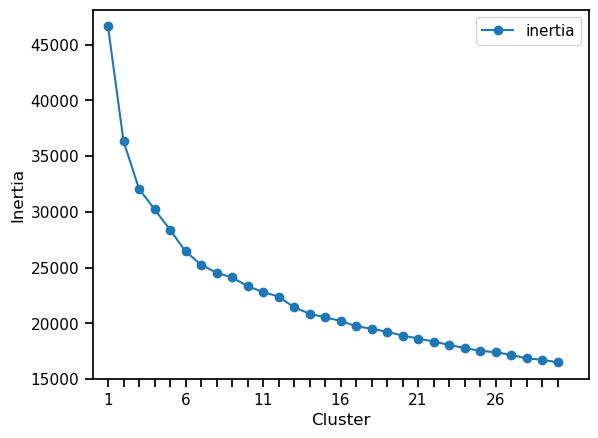

In [35]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,30,1))
ax.set_xlim(-1,31)
ax.set(xlabel='Cluster', ylabel='Inertia');

There is no obvious elbow point.

In [36]:
# List of different cluster counts
cluster_counts = [6, 7, 8, 9, 10]

# Loop through each cluster count
for n_clusters in cluster_counts:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=31)
    df['cluster'] = kmeans.fit_predict(df[num_columns])

    # Group by 'class' and 'cluster', and calculate the counts for each class in each cluster
    cluster_class_counts = df.groupby(['cluster', 'class']).size().reset_index(name='count')

    # Calculate the total number of points for each class
    class_totals = df.groupby('class').size().reset_index(name='class_total')
    
    # Merge the total number of points per class with the class count per cluster
    cluster_class_counts = cluster_class_counts.merge(class_totals, on='class')

    # Calculate the fraction as: count of class in cluster / total count of class
    cluster_class_counts['fraction'] = cluster_class_counts['count'] / cluster_class_counts['class_total']

    # For each class, find the most common cluster
    dominant_cluster = cluster_class_counts.loc[cluster_class_counts.groupby('class')['fraction'].idxmax()]

    # Calculate the percentage of the class in the dominant cluster
    dominant_cluster['percentage'] = dominant_cluster['fraction'] * 100

    # Display the results
    print(f"Class breakdown for {n_clusters} clusters (most common cluster and percentage):")
    print(dominant_cluster[['class', 'cluster', 'count', 'percentage']])
    print("\n" + "-"*50 + "\n")

Class breakdown for 6 clusters (most common cluster and percentage):
   class  cluster  count  percentage
13   AMO        3    103   79.230769
14   APO        3    127   80.891720
15   ATE        3     19   70.370370
9    CEN        2      3  100.000000
5    IMB        1      9  100.000000
6    MBA        1    522   40.308880
7    MCA        1     64   71.910112
11   OMB        2     64   96.969697
12   TJN        2     17  100.000000
20   TNO        4      1  100.000000

--------------------------------------------------

Class breakdown for 7 clusters (most common cluster and percentage):
   class  cluster  count  percentage
13   AMO        3    100   76.923077
14   APO        3    127   80.891720
15   ATE        3     19   70.370370
8    CEN        2      3  100.000000
1    IMB        0      9  100.000000
25   MBA        6    507   39.150579
3    MCA        0     70   78.651685
10   OMB        2     63   95.454545
11   TJN        2     17  100.000000
12   TNO        2      1  100.00

The clusters do not match the classes well using K-means which is expected since the classes are not balanced. Creating a more balanced dataset is likely to introduce bias but could be attempted. This is not the typical use for clustering however it was able to show that the APO and ATE class are similar as they would typically be grouped in the same cluster.

DBSCAN Clustering

DBSCAN found 6 clusters and 261 points of noise.


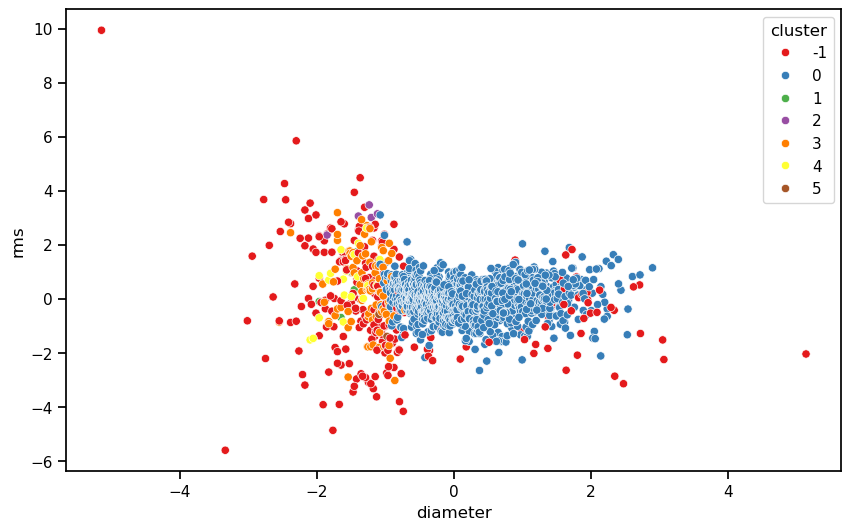

In [37]:
# Fit DBSCAN model
cluster = DBSCAN(eps=3, min_samples=5)
cluster.fit(df[num_columns])

# Print the number of clusters and noise points
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

# Create a new column in the DataFrame to store the cluster labels
df['cluster'] = cluster.labels_

# Plot the scatterplot, coloring by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[num_columns[0]], y=df[num_columns[1]], hue='cluster', palette='Set1', data=df, legend='full')

# Show the plot
plt.show()

In [38]:
# Apply DBSCAN clustering
cluster = DBSCAN(eps=3, min_samples=8)
df['cluster'] = cluster.fit_predict(df[num_columns])

# Group by 'class' and 'cluster', and calculate the counts for each class in each cluster
cluster_class_counts = df.groupby(['cluster', 'class']).size().reset_index(name='count')

# Calculate the total number of points for each class
class_totals = df.groupby('class').size().reset_index(name='class_total')
    
# Merge the total number of points per class with the class count per cluster
cluster_class_counts = cluster_class_counts.merge(class_totals, on='class')

# Calculate the fraction as: count of class in cluster / total count of class
cluster_class_counts['fraction'] = cluster_class_counts['count'] / cluster_class_counts['class_total']

# For each class, find the most common cluster
dominant_cluster = cluster_class_counts.loc[cluster_class_counts.groupby('class')['fraction'].idxmax()]

# Calculate the percentage of the class in the dominant cluster
dominant_cluster['percentage'] = dominant_cluster['fraction'] * 100

# Display the results
print(dominant_cluster[['class', 'cluster', 'count', 'percentage']])

   class  cluster  count  percentage
0    AMO       -1     80   61.538462
1    APO       -1    134   85.350318
2    ATE       -1     25   92.592593
3    CEN       -1      3  100.000000
4    IMB       -1      9  100.000000
10   MBA        0   1255   96.911197
11   MCA        0     74   83.146067
12   OMB        0     57   86.363636
13   TJN        0     11   64.705882
9    TNO       -1      1  100.000000


In [39]:
# Apply DBSCAN clustering
cluster = DBSCAN(eps=3, min_samples=8)
df['cluster'] = cluster.fit_predict(df[num_columns])

# Group by 'spec' and 'cluster', and calculate the counts for each spec in each cluster
cluster_spec_counts = df.groupby(['cluster', 'spec']).size().reset_index(name='count')

# Calculate the total number of points for each spec
spec_totals = df.groupby('spec').size().reset_index(name='spec_total')
    
# Merge the total number of points per spec with the spec count per cluster
cluster_spec_counts = cluster_spec_counts.merge(spec_totals, on='spec')

# Calculate the fraction as: count of spec in cluster / total count of spec
cluster_spec_counts['fraction'] = cluster_spec_counts['count'] / cluster_spec_counts['spec_total']

# For each spec, find the most common cluster
dominant_cluster = cluster_spec_counts.loc[cluster_spec_counts.groupby('spec')['fraction'].idxmax()]

# Calculate the percentage of the spec in the dominant cluster
dominant_cluster['percentage'] = dominant_cluster['fraction'] * 100

# Display the results
print(dominant_cluster[['spec', 'cluster', 'count', 'percentage']])

     spec  cluster  count  percentage
27      B        0     59   85.507246
28      C        0    202   89.380531
29     Cb        0     31   86.111111
30     Cg        0      9   90.000000
31    Cgh        0     17  100.000000
32     Ch        0    135   97.122302
33      D        0     31   73.809524
34      K        0     30   78.947368
35      L        0     34   82.926829
36     Ld        0     12   80.000000
37      M        0     16   84.210526
10      O       -1      6   85.714286
39      P        0     20   90.909091
12      Q       -1     19   95.000000
40      R        0      3   60.000000
41      S        0    375   81.344902
15  S(IV)       -1      1  100.000000
42     Sa        0     34   89.473684
43     Sk        0     15   51.724138
44     Sl        0     48   85.714286
45     Sq        0     53   45.689655
46     Sr        0     14   51.851852
47      T        0     14   70.000000
48      V        0     34   68.000000
49      X        0    105   72.916667
50     Xc   

DBSCAN did not appear to to identify the clusters based on their spec, and the main cluster was mostly the largest class of MBA.

Dimensionality Reduction

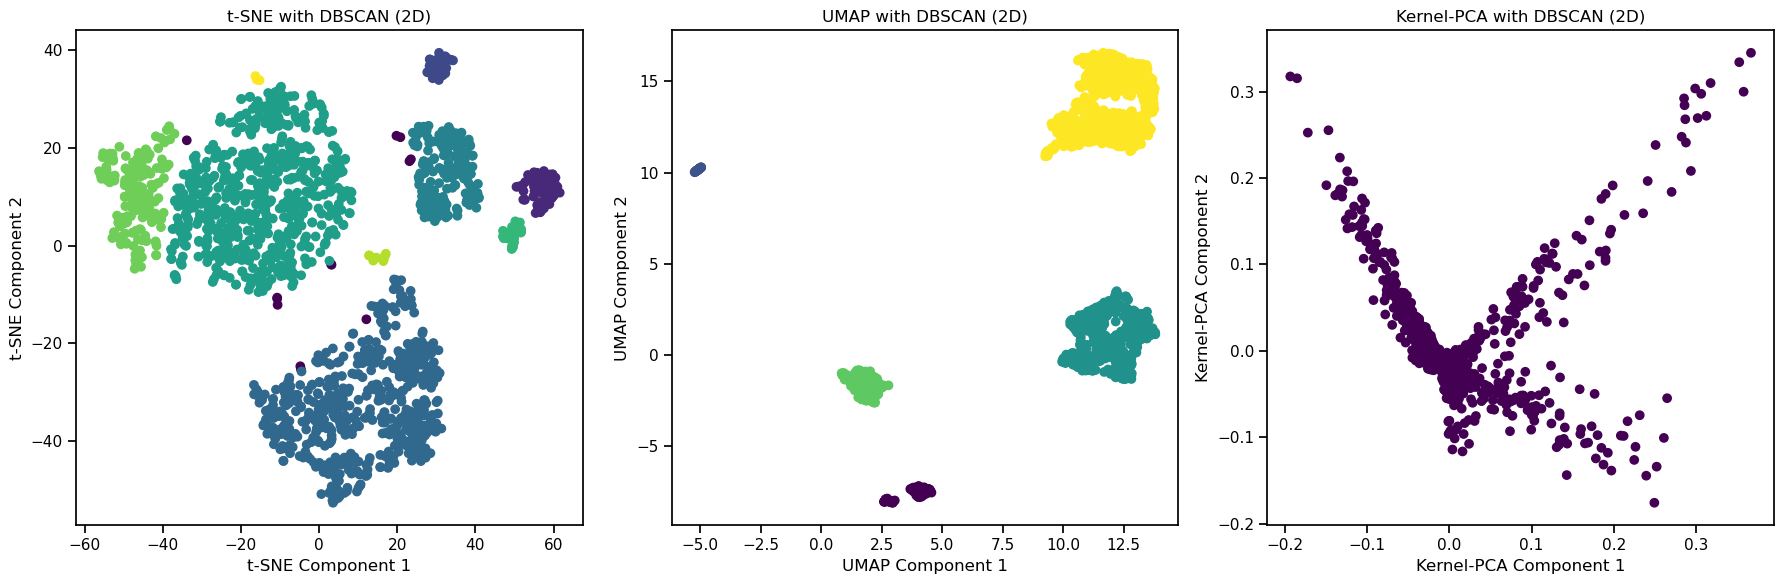

In [40]:
# Apply t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=31)
tsne_results = tsne.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the t-SNE reduced data
dbscan_tsne = DBSCAN(eps=3, min_samples=5)
labels_tsne = dbscan_tsne.fit_predict(tsne_results)

# Apply UMAP to reduce the data to 2 dimensions
umap_model = umap.UMAP(n_components=2, random_state=31)
umap_results = umap_model.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the UMAP reduced data
dbscan_umap = DBSCAN(eps=3, min_samples=5)
labels_umap = dbscan_umap.fit_predict(umap_results)

# Apply Kernel-PCA to reduce the data to 2 dimensions
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5) 
kpca_results = kpca.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the KernelPCA reduced data
dbscan_kpca = DBSCAN(eps=1, min_samples=5)
labels_kpca = dbscan_kpca.fit_predict(kpca_results)

# Plotting the results in 2D for each technique
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# t-SNE Plot
axes[0].scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_tsne, cmap='viridis')
axes[0].set_title('t-SNE with DBSCAN (2D)')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# UMAP Plot
axes[1].scatter(umap_results[:, 0], umap_results[:, 1], c=labels_umap, cmap='viridis')
axes[1].set_title('UMAP with DBSCAN (2D)')
axes[1].set_xlabel('UMAP Component 1')
axes[1].set_ylabel('UMAP Component 2')

# Kernel-PCA Plot
axes[2].scatter(kpca_results[:, 0], kpca_results[:, 1], c=labels_kpca, cmap='viridis')
axes[2].set_title('Kernel-PCA with DBSCAN (2D)')
axes[2].set_xlabel('Kernel-PCA Component 1')
axes[2].set_ylabel('Kernel-PCA Component 2')

# Show the plot
plt.tight_layout()
plt.show()

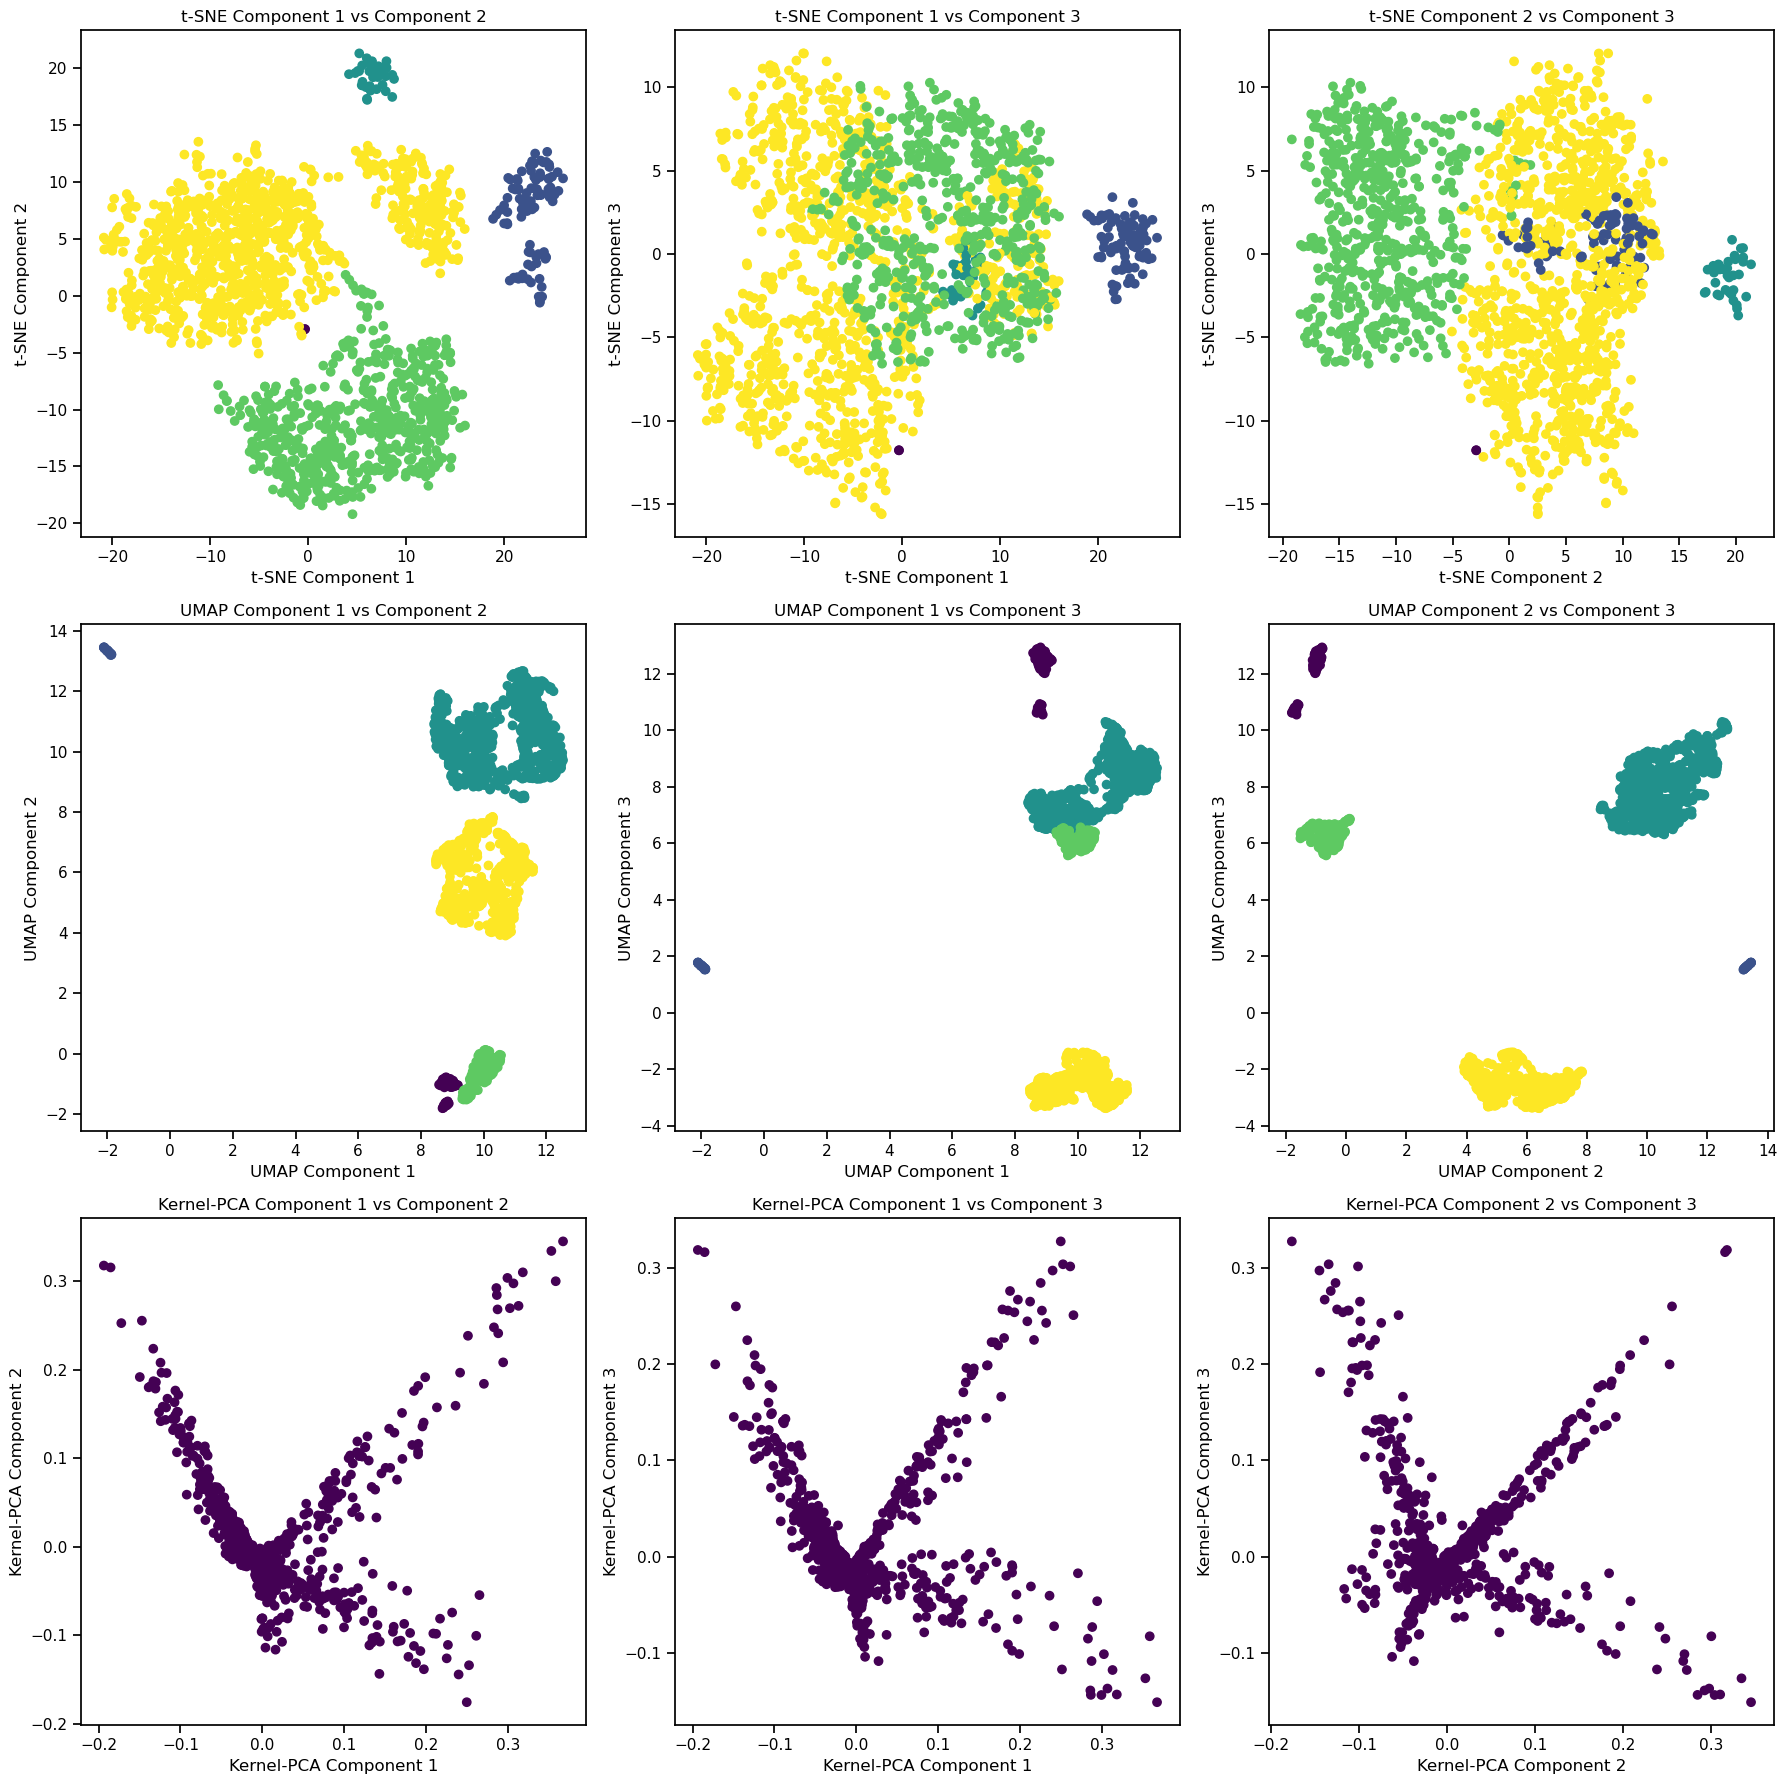

In [41]:
# Apply t-SNE to reduce the data to 3 dimensions
tsne = TSNE(n_components=3, random_state=31)
tsne_results = tsne.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the t-SNE reduced data
dbscan_tsne = DBSCAN(eps=3, min_samples=5)
labels_tsne = dbscan_tsne.fit_predict(tsne_results)

# Apply UMAP to reduce the data to 3 dimensions
umap_model = umap.UMAP(n_components=3, random_state=31)
umap_results = umap_model.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the UMAP reduced data
dbscan_umap = DBSCAN(eps=3, min_samples=5)
labels_umap = dbscan_umap.fit_predict(umap_results)

# Apply Kernel-PCA with RBF kernel to reduce the data to 3 dimensions
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.5)
kpca_results = kpca.fit_transform(df[num_columns])

# Apply DBSCAN clustering on the KernelPCA reduced data
dbscan_kpca = DBSCAN(eps=3, min_samples=5)
labels_kpca = dbscan_kpca.fit_predict(kpca_results)

# Plotting the results in 2D for each technique
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# t-SNE 2D Plots
axes[0, 0].scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_tsne, cmap='viridis')
axes[0, 0].set_title('t-SNE Component 1 vs Component 2')
axes[0, 0].set_xlabel('t-SNE Component 1')
axes[0, 0].set_ylabel('t-SNE Component 2')

axes[0, 1].scatter(tsne_results[:, 0], tsne_results[:, 2], c=labels_tsne, cmap='viridis')
axes[0, 1].set_title('t-SNE Component 1 vs Component 3')
axes[0, 1].set_xlabel('t-SNE Component 1')
axes[0, 1].set_ylabel('t-SNE Component 3')

axes[0, 2].scatter(tsne_results[:, 1], tsne_results[:, 2], c=labels_tsne, cmap='viridis')
axes[0, 2].set_title('t-SNE Component 2 vs Component 3')
axes[0, 2].set_xlabel('t-SNE Component 2')
axes[0, 2].set_ylabel('t-SNE Component 3')

# UMAP 2D Plots
axes[1, 0].scatter(umap_results[:, 0], umap_results[:, 1], c=labels_umap, cmap='viridis')
axes[1, 0].set_title('UMAP Component 1 vs Component 2')
axes[1, 0].set_xlabel('UMAP Component 1')
axes[1, 0].set_ylabel('UMAP Component 2')

axes[1, 1].scatter(umap_results[:, 0], umap_results[:, 2], c=labels_umap, cmap='viridis')
axes[1, 1].set_title('UMAP Component 1 vs Component 3')
axes[1, 1].set_xlabel('UMAP Component 1')
axes[1, 1].set_ylabel('UMAP Component 3')

axes[1, 2].scatter(umap_results[:, 1], umap_results[:, 2], c=labels_umap, cmap='viridis')
axes[1, 2].set_title('UMAP Component 2 vs Component 3')
axes[1, 2].set_xlabel('UMAP Component 2')
axes[1, 2].set_ylabel('UMAP Component 3')

# Kernel-PCA 2D Plots
axes[2, 0].scatter(kpca_results[:, 0], kpca_results[:, 1], c=labels_kpca, cmap='viridis')
axes[2, 0].set_title('Kernel-PCA Component 1 vs Component 2')
axes[2, 0].set_xlabel('Kernel-PCA Component 1')
axes[2, 0].set_ylabel('Kernel-PCA Component 2')

axes[2, 1].scatter(kpca_results[:, 0], kpca_results[:, 2], c=labels_kpca, cmap='viridis')
axes[2, 1].set_title('Kernel-PCA Component 1 vs Component 3')
axes[2, 1].set_xlabel('Kernel-PCA Component 1')
axes[2, 1].set_ylabel('Kernel-PCA Component 3')

axes[2, 2].scatter(kpca_results[:, 1], kpca_results[:, 2], c=labels_kpca, cmap='viridis')
axes[2, 2].set_title('Kernel-PCA Component 2 vs Component 3')
axes[2, 2].set_xlabel('Kernel-PCA Component 2')
axes[2, 2].set_ylabel('Kernel-PCA Component 3')

# Show the plot
plt.tight_layout()
plt.show()

t-SNE and UMAP appear to work better, showing clear clusters of data where as Kernal-PCA struggles to create clusters. This is because Kernal-PCA focuses on maximising variance while t-SNE and UMAP preserve local structure which is important for clustering.

In [42]:
# Print the number of clusters and noise points for each DBSCAN
print(f'DBSCAN found {len(set(dbscan_tsne.labels_) - set([-1]))} clusters and {(dbscan_tsne.labels_ == -1).sum()} points of noise for t-SNE.')
print(f'DBSCAN found {len(set(dbscan_umap.labels_) - set([-1]))} clusters and {(dbscan_umap.labels_ == -1).sum()} points of noise for UMAP.')
print(f'DBSCAN found {len(set(dbscan_kpca.labels_) - set([-1]))} clusters and {(dbscan_kpca.labels_ == -1).sum()} points of noise for K-PCA.')

DBSCAN found 4 clusters and 2 points of noise for t-SNE.
DBSCAN found 5 clusters and 0 points of noise for UMAP.
DBSCAN found 1 clusters and 0 points of noise for K-PCA.


In [43]:
# Compare cluster labels by Compute Adjusted Rand Index 
ari_tsne_umap = adjusted_rand_score(labels_tsne, labels_umap)
ari_tsne_kpca = adjusted_rand_score(labels_tsne, labels_kpca)
ari_umap_kpca = adjusted_rand_score(labels_umap, labels_kpca)

In [44]:
ari_tsne_umap

0.7733697428187631

The t-SNE and UMAP have close agreement where as since no clusteres were found using Kernal-PCA the ARI scores between them and the other two are 0.

In [45]:
# Create and fit a range of K-means models
km_list1 = list()
km_list2 = list()
km_list3 = list()

for clust in range(1,31):
    km = KMeans(n_clusters=clust, random_state=31)
    km = km.fit(tsne_results)
    
    km_list1.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

    km = KMeans(n_clusters=clust, random_state=31)
    km = km.fit(umap_results)
    
    km_list2.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

    km = KMeans(n_clusters=clust, random_state=31)
    km = km.fit(kpca_results)
    
    km_list3.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

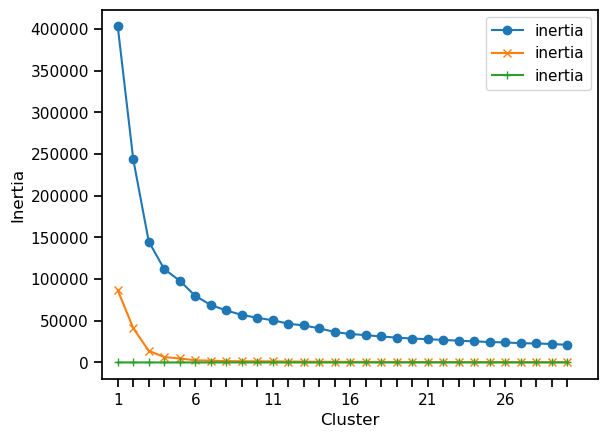

In [46]:
plot_data1 = (pd.concat(km_list1, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))
plot_data2 = (pd.concat(km_list2, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))
plot_data3 = (pd.concat(km_list3, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))


ax = plot_data1.plot(marker='o', linestyle='-', label='t-SNE')
plot_data2.plot(marker='x', linestyle='-', ax=ax, label='UMAP')
plot_data3.plot(marker='+', linestyle='-', ax=ax, label='K-PCA')
ax.set_xticks(range(0,30,1))
ax.set_xlim(-1,31)
ax.set(xlabel='Cluster', ylabel='Inertia');

Elbow appears to be at 3/4 clusters

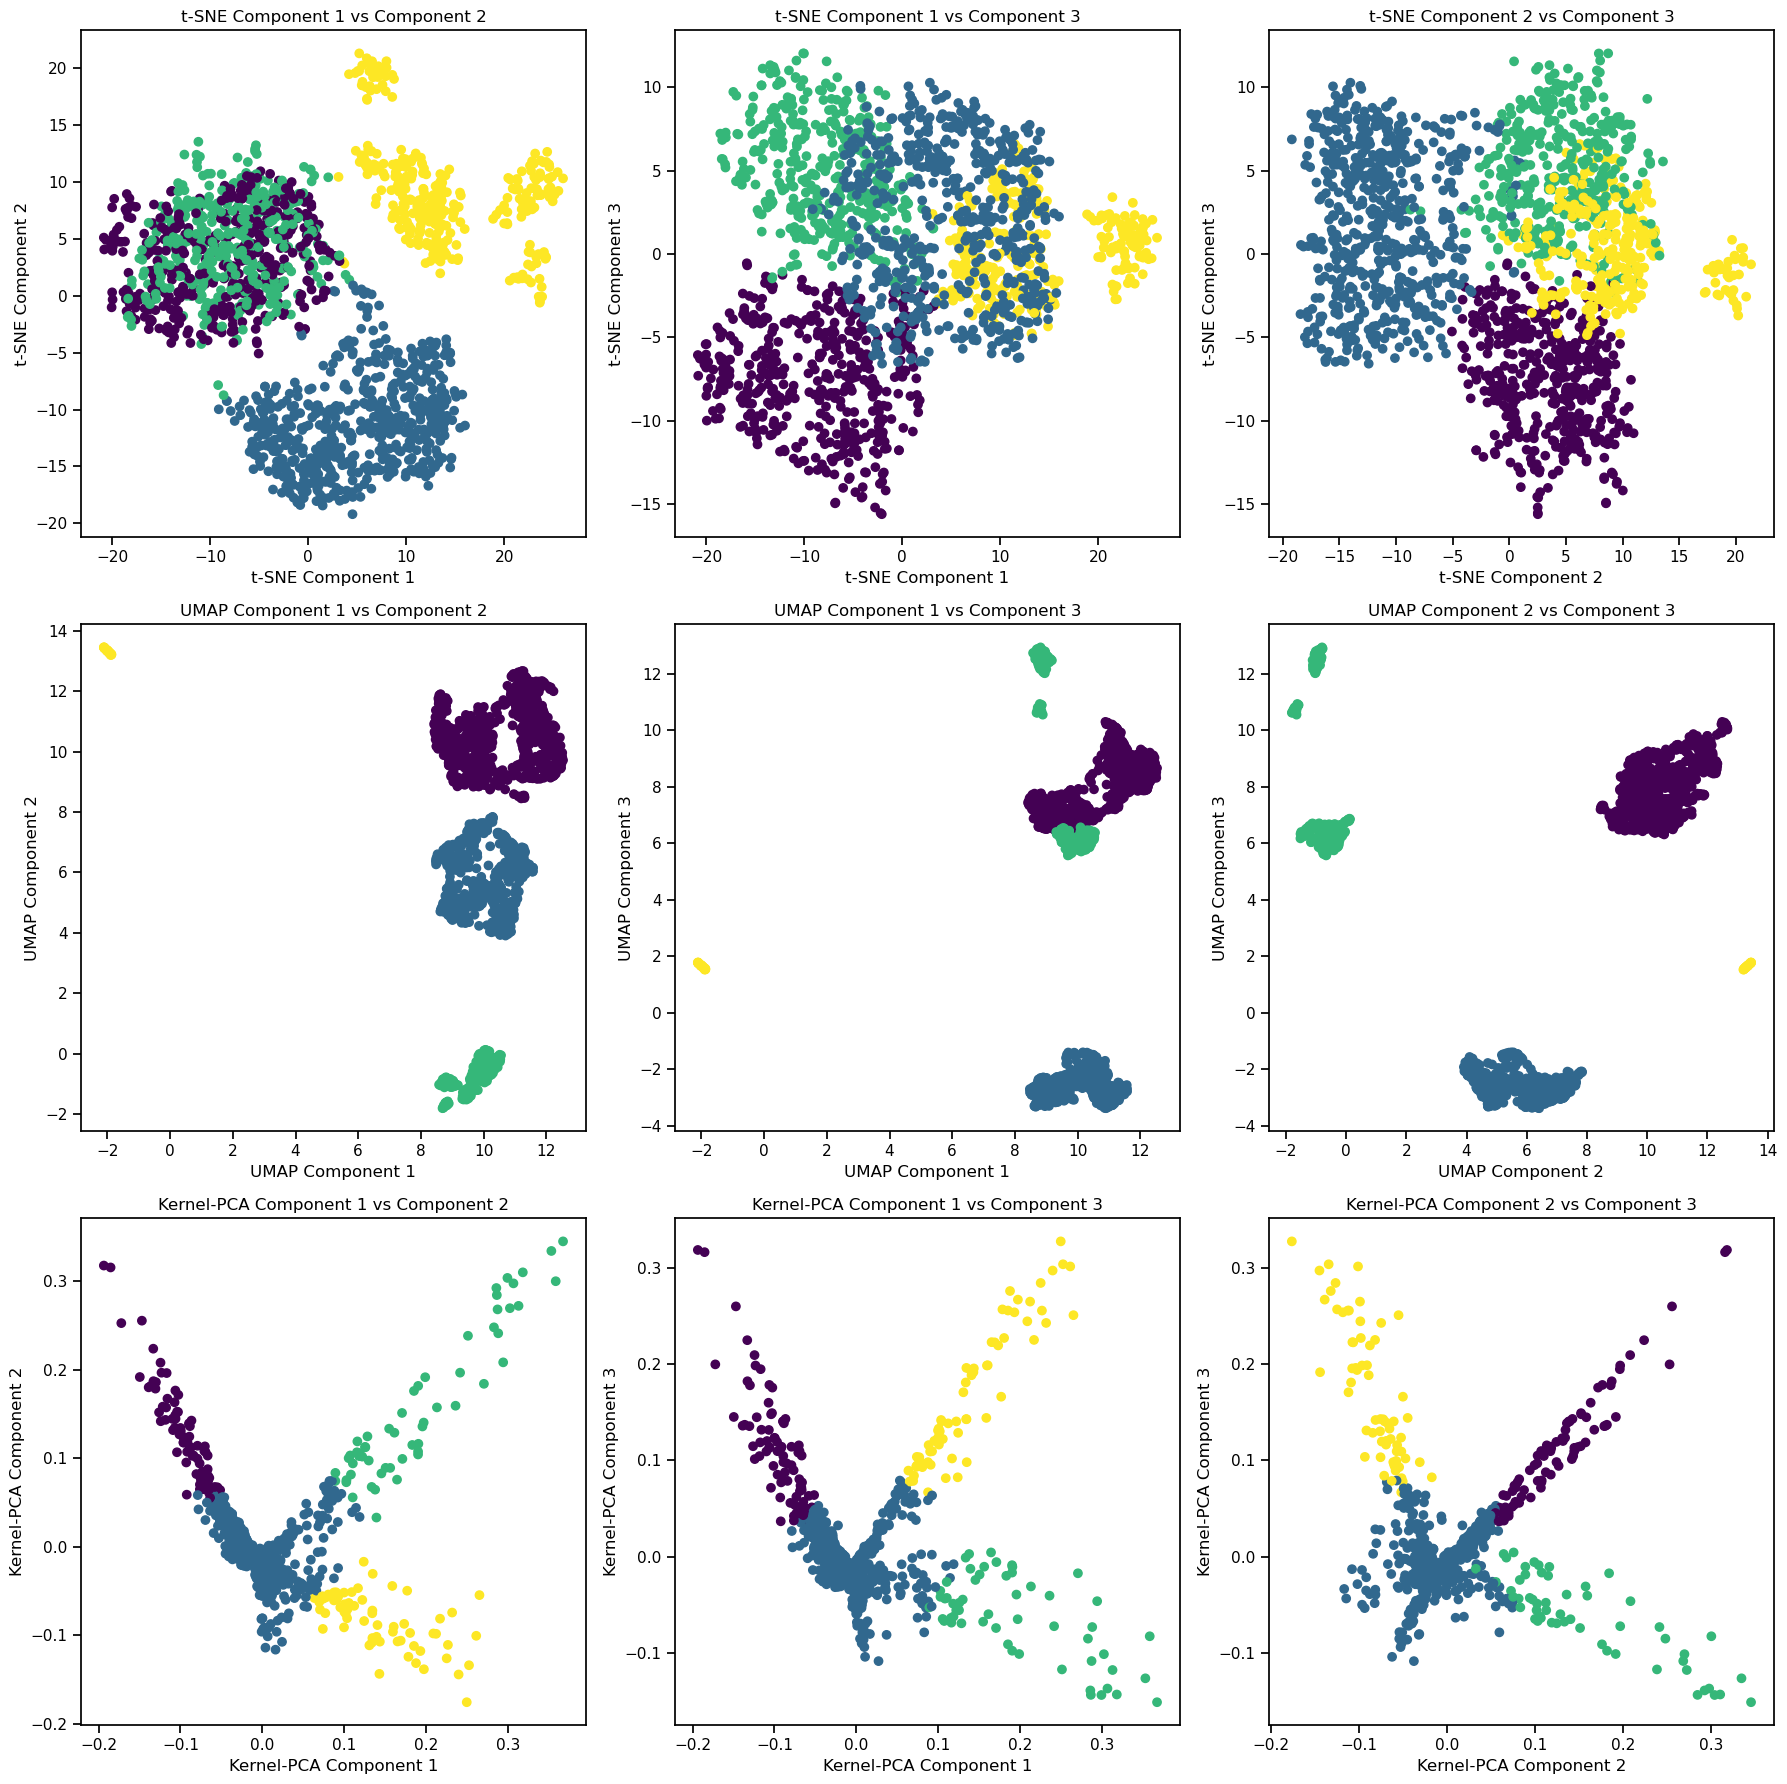

In [47]:
# Apply K-means clustering on the t-SNE reduced data
kmeans_tsne = KMeans(n_clusters=4, random_state=31)
labels_tsne2 = kmeans_tsne.fit_predict(tsne_results)

# Apply K-means clustering on the UMAP reduced data
kmeans_umap = KMeans(n_clusters=4, random_state=31)
labels_umap2 = kmeans_umap.fit_predict(umap_results)

# Apply K-means clustering on the KernelPCA reduced data
kmeans_kpca = KMeans(n_clusters=4, random_state=31)
labels_kpca2 = kmeans_kpca.fit_predict(kpca_results)

# Plotting the results in 2D for each technique
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# t-SNE 2D Plots
axes[0, 0].scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels_tsne2, cmap='viridis')
axes[0, 0].set_title('t-SNE Component 1 vs Component 2')
axes[0, 0].set_xlabel('t-SNE Component 1')
axes[0, 0].set_ylabel('t-SNE Component 2')

axes[0, 1].scatter(tsne_results[:, 0], tsne_results[:, 2], c=labels_tsne2, cmap='viridis')
axes[0, 1].set_title('t-SNE Component 1 vs Component 3')
axes[0, 1].set_xlabel('t-SNE Component 1')
axes[0, 1].set_ylabel('t-SNE Component 3')

axes[0, 2].scatter(tsne_results[:, 1], tsne_results[:, 2], c=labels_tsne2, cmap='viridis')
axes[0, 2].set_title('t-SNE Component 2 vs Component 3')
axes[0, 2].set_xlabel('t-SNE Component 2')
axes[0, 2].set_ylabel('t-SNE Component 3')

# UMAP 2D Plots
axes[1, 0].scatter(umap_results[:, 0], umap_results[:, 1], c=labels_umap2, cmap='viridis')
axes[1, 0].set_title('UMAP Component 1 vs Component 2')
axes[1, 0].set_xlabel('UMAP Component 1')
axes[1, 0].set_ylabel('UMAP Component 2')

axes[1, 1].scatter(umap_results[:, 0], umap_results[:, 2], c=labels_umap2, cmap='viridis')
axes[1, 1].set_title('UMAP Component 1 vs Component 3')
axes[1, 1].set_xlabel('UMAP Component 1')
axes[1, 1].set_ylabel('UMAP Component 3')

axes[1, 2].scatter(umap_results[:, 1], umap_results[:, 2], c=labels_umap2, cmap='viridis')
axes[1, 2].set_title('UMAP Component 2 vs Component 3')
axes[1, 2].set_xlabel('UMAP Component 2')
axes[1, 2].set_ylabel('UMAP Component 3')

# Kernel-PCA 2D Plots
axes[2, 0].scatter(kpca_results[:, 0], kpca_results[:, 1], c=labels_kpca2, cmap='viridis')
axes[2, 0].set_title('Kernel-PCA Component 1 vs Component 2')
axes[2, 0].set_xlabel('Kernel-PCA Component 1')
axes[2, 0].set_ylabel('Kernel-PCA Component 2')

axes[2, 1].scatter(kpca_results[:, 0], kpca_results[:, 2], c=labels_kpca2, cmap='viridis')
axes[2, 1].set_title('Kernel-PCA Component 1 vs Component 3')
axes[2, 1].set_xlabel('Kernel-PCA Component 1')
axes[2, 1].set_ylabel('Kernel-PCA Component 3')

axes[2, 2].scatter(kpca_results[:, 1], kpca_results[:, 2], c=labels_kpca2, cmap='viridis')
axes[2, 2].set_title('Kernel-PCA Component 2 vs Component 3')
axes[2, 2].set_xlabel('Kernel-PCA Component 2')
axes[2, 2].set_ylabel('Kernel-PCA Component 3')

# Show the plot
plt.tight_layout()
plt.show()

In [48]:
# Compare cluster labels by Compute Adjusted Rand Index 
ari_tsne_umap = adjusted_rand_score(labels_tsne2, labels_umap2)
ari_tsne_kpca = adjusted_rand_score(labels_tsne2, labels_kpca2)
ari_umap_kpca = adjusted_rand_score(labels_umap2, labels_kpca2)

In [49]:
print(f"ARI between t-SNE and UMAP: {ari_tsne_umap:.4f}")
print(f"ARI between t-SNE and Kernel-PCA: {ari_tsne_kpca:.4f}")
print(f"ARI between UMAP and Kernel-PCA: {ari_umap_kpca:.4f}")

ARI between t-SNE and UMAP: 0.6917
ARI between t-SNE and Kernel-PCA: -0.0126
ARI between UMAP and Kernel-PCA: -0.0013


There is less similarity between the k-means clustering when using 4 clusters (Higher when using 3 however, DBSCAN found 4/5 clusters). Visually these differences can be seen.

Comparing the non-dimensionality reduced clustering to the non-dimensionality reduced clustering it is more visually obvious how the clusters are formed.

In [50]:
def compare_dominant_clusters(df, clustering_labels, method_names):
    # Create an empty dictionary to hold dominant cluster results for each method
    dominant_clusters = {}

    # Calculate the total number of points for each class
    class_totals = df.groupby('class').size().reset_index(name='class_total')

    for i, method_name in enumerate(method_names):
        # Add cluster labels for each clustering method into the dataframe
        df[f'cluster_{i}'] = clustering_labels[i]

        # Group by 'class' and the current clustering result, calculate counts
        cluster_class_counts = df.groupby(['class', f'cluster_{i}']).size().reset_index(name='count')

        # Merge the total number of points per class with the class count per cluster for each method
        cluster_class_counts = cluster_class_counts.merge(class_totals, on='class')

        # Calculate the fraction as: count of class in cluster / total count of class
        cluster_class_counts['fraction'] = cluster_class_counts['count'] / cluster_class_counts['class_total']

        # For each class, find the most common cluster
        dominant_cluster = cluster_class_counts.loc[cluster_class_counts.groupby('class')['fraction'].idxmax()]

        # Calculate the percentage of the class in the dominant cluster
        dominant_cluster['percentage'] = dominant_cluster['fraction'] * 100

        # Store the dominant cluster for the current method
        dominant_clusters[method_name] = dominant_cluster[['class', f'cluster_{i}', 'count', 'percentage']]

    return dominant_clusters

# Assign label and method names
clustering_labels = [labels_tsne, labels_umap, labels_kpca, labels_tsne2, labels_umap2, labels_kpca2]
method_names = ['t-SNE DBSCAN', 'UMAP DBSCAN', 'K-PCA DBSCAN', 't-SNE K-means', 'UMAP K-means', 'K-PCA K-means']

# Call the function
dominant_clusters = compare_dominant_clusters(df, clustering_labels, method_names)

# Display results for each method
for method, result in dominant_clusters.items():
    print(f"Dominant clusters for {method}:")
    print(result)

Dominant clusters for t-SNE DBSCAN:
   class  cluster_0  count  percentage
2    AMO          3    102   78.461538
3    APO          0     71   45.222930
6    ATE          0     14   51.851852
9    CEN          3      3  100.000000
10   IMB          2      9  100.000000
13   MBA          3    758   58.532819
15   MCA          2     68   76.404494
18   OMB          3     65   98.484848
19   TJN          3     17  100.000000
20   TNO          3      1  100.000000
Dominant clusters for UMAP DBSCAN:
   class  cluster_1  count  percentage
3    AMO          3    100   76.923077
5    APO          0     71   45.222930
8    ATE          0     14   51.851852
11   CEN          2      3  100.000000
12   IMB          2      6   66.666667
14   MBA          2    762   58.841699
18   MCA          4     64   71.910112
19   OMB          2     65   98.484848
21   TJN          2     17  100.000000
22   TNO          2      1  100.000000
Dominant clusters for K-PCA DBSCAN:
  class  cluster_2  count  percenta

The methods do tend to cluster a majority of the minor classes however the largest class of MBA and the similar cluster of MCA tend not to have a cluster featuring a large majority of the class.

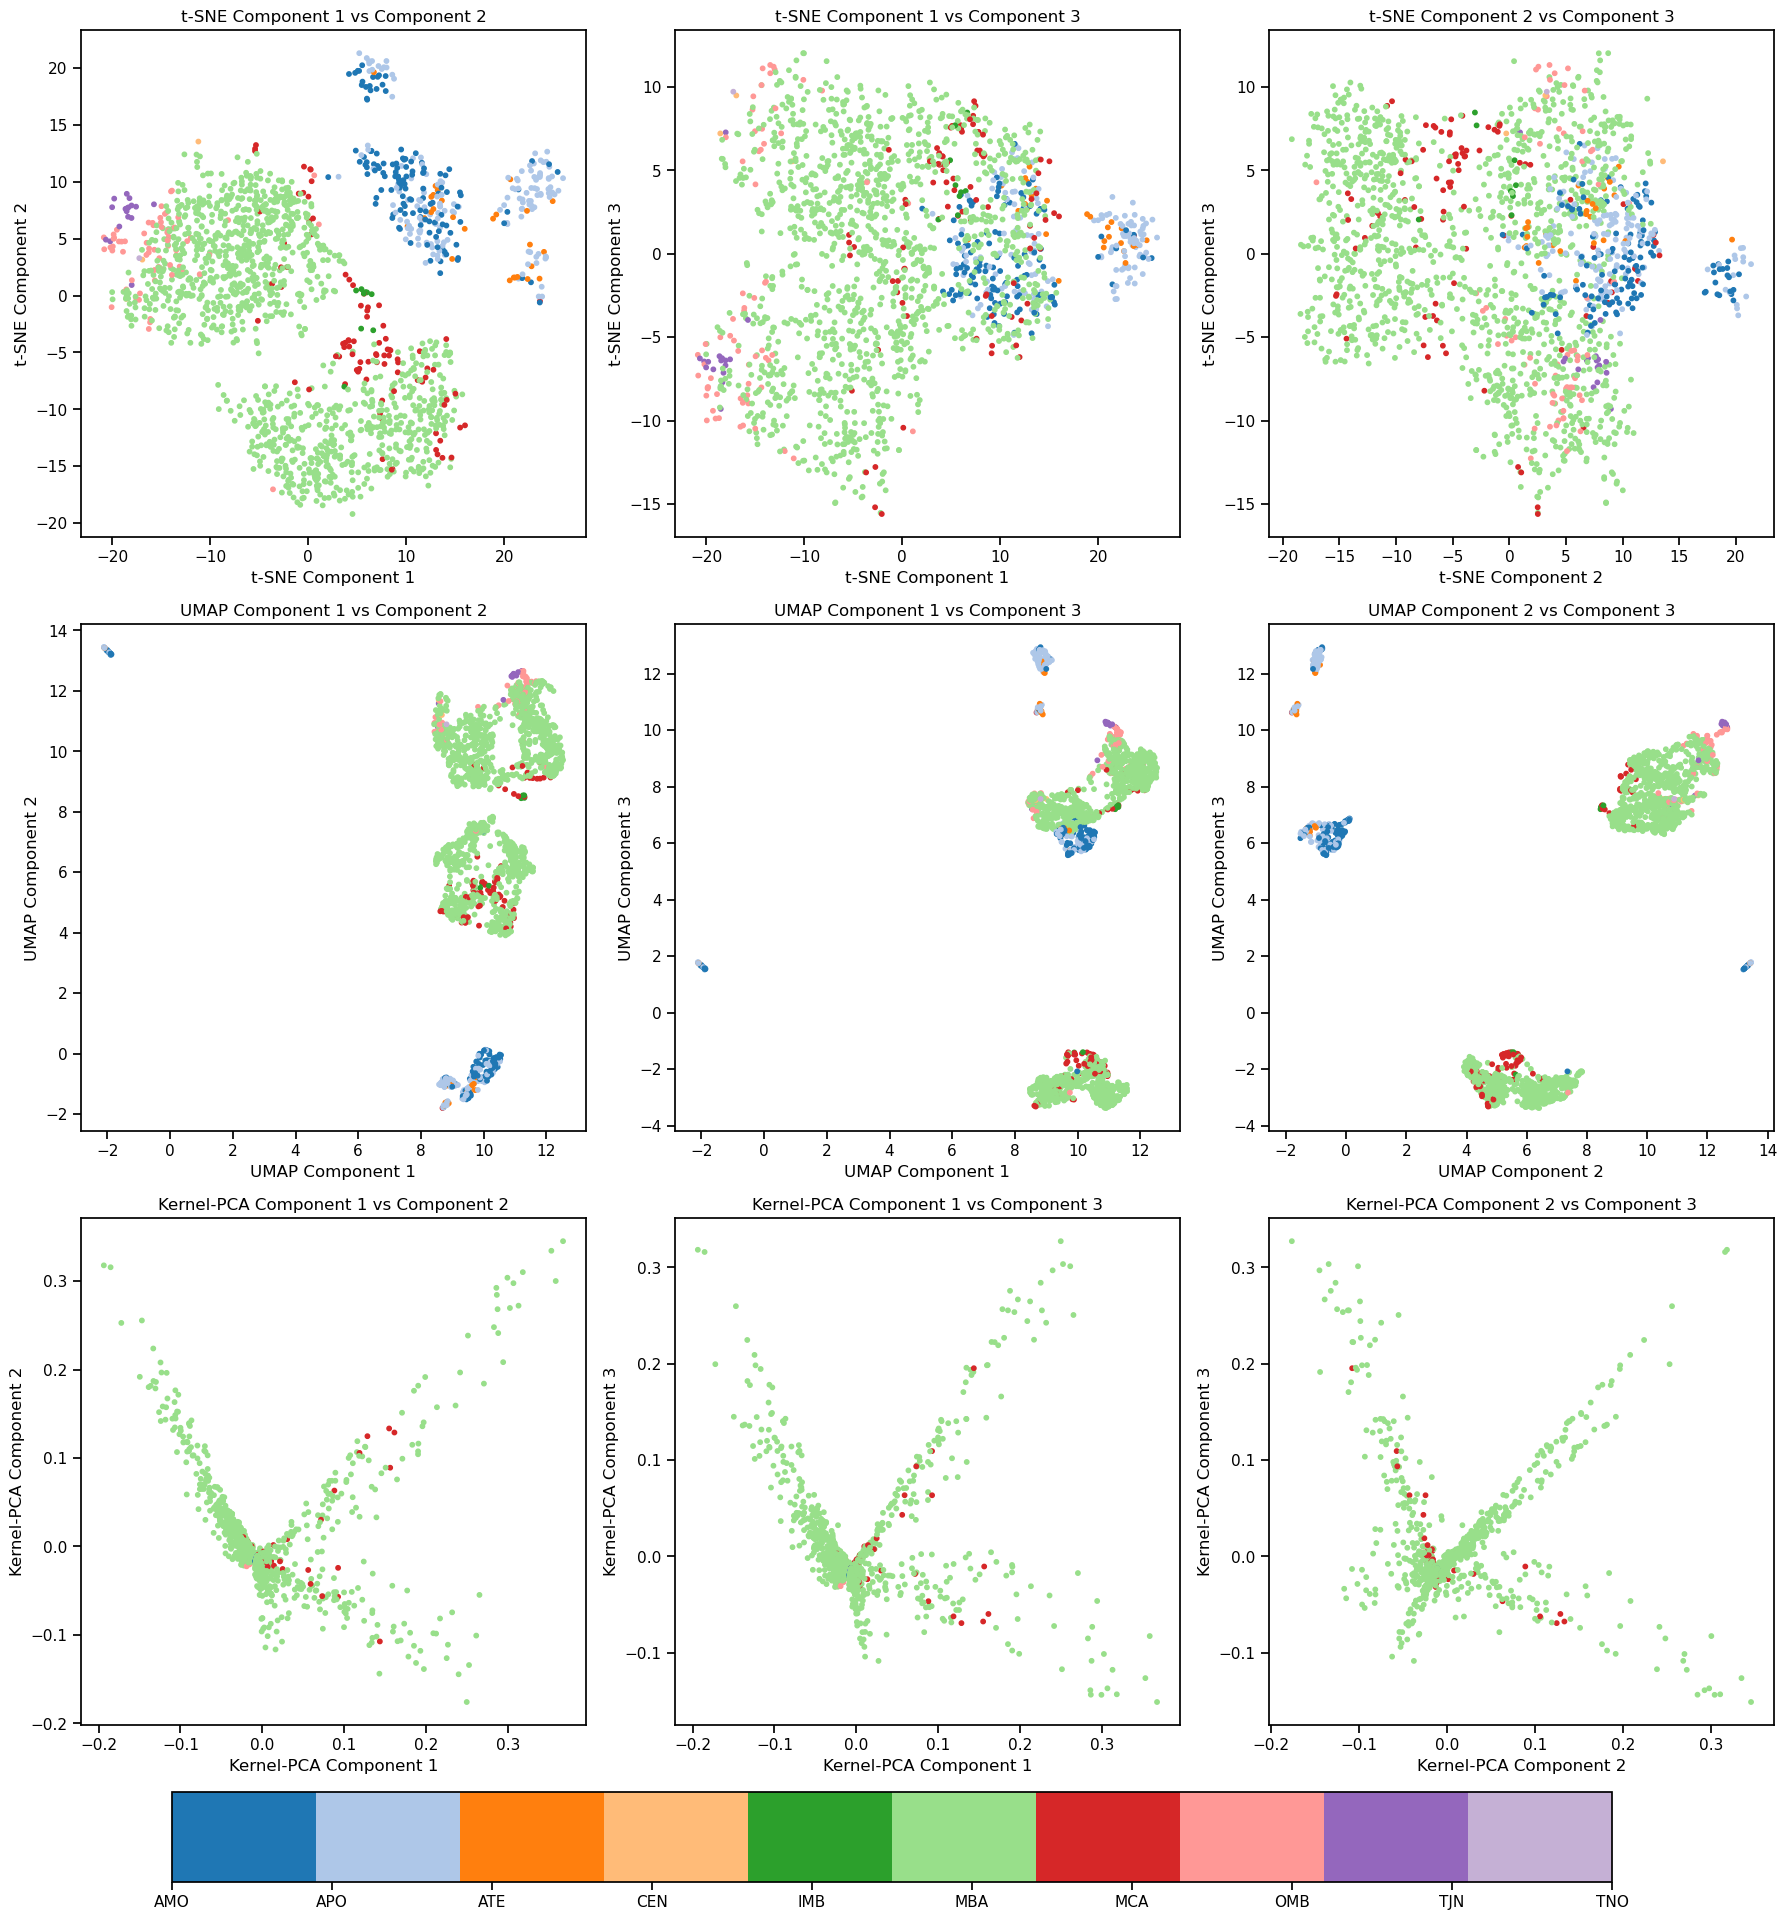

In [51]:
# Sort the unique classes alphabetically
unique_classes = np.sort(df['class'].unique())
num_classes = len(unique_classes)

# Map each sorted class to a specific colour
colours = sns.color_palette("tab20", num_classes)
class_to_colour = {class_name: colours[i] for i, class_name in enumerate(unique_classes)}

# Create a colourmap for the colours
cmap = mpl.colors.ListedColormap(colours)

# Order the class coloumn so the colours align with the colourmap
df['class'] = pd.Categorical(df['class'], categories=unique_classes, ordered=True)

# Plotting the results in 2D for each technique
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# t-SNE 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[0, i].scatter(tsne_results[:, comp1], tsne_results[:, comp2], 
                                  c=df['class'].cat.codes, cmap=cmap, s=10)
    axes[0, i].set_title(f't-SNE Component {comp1+1} vs Component {comp2+1}')
    axes[0, i].set_xlabel(f't-SNE Component {comp1+1}')
    axes[0, i].set_ylabel(f't-SNE Component {comp2+1}')

# UMAP 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[1, i].scatter(umap_results[:, comp1], umap_results[:, comp2], 
                                  c=df['class'].cat.codes, cmap=cmap, s=10)
    axes[1, i].set_title(f'UMAP Component {comp1+1} vs Component {comp2+1}')
    axes[1, i].set_xlabel(f'UMAP Component {comp1+1}')
    axes[1, i].set_ylabel(f'UMAP Component {comp2+1}')

# Kernel-PCA 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[2, i].scatter(kpca_results[:, comp1], kpca_results[:, comp2], 
                                  c=df['class'].cat.codes, cmap=cmap, s=10)
    axes[2, i].set_title(f'Kernel-PCA Component {comp1+1} vs Component {comp2+1}')
    axes[2, i].set_xlabel(f'Kernel-PCA Component {comp1+1}')
    axes[2, i].set_ylabel(f'Kernel-PCA Component {comp2+1}')

# Avoid overlapping subplots
plt.tight_layout()

# Plot the custom colourbar below the subplots
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, orientation='horizontal')

# Set the ticks based on the number of unique classes
ticks = np.linspace(0, 1, num_classes)
cbar.set_ticks(ticks)

# Set the correct labels based on the sorted classes
cbar.set_ticklabels(unique_classes)

# Show the plot
plt.show()

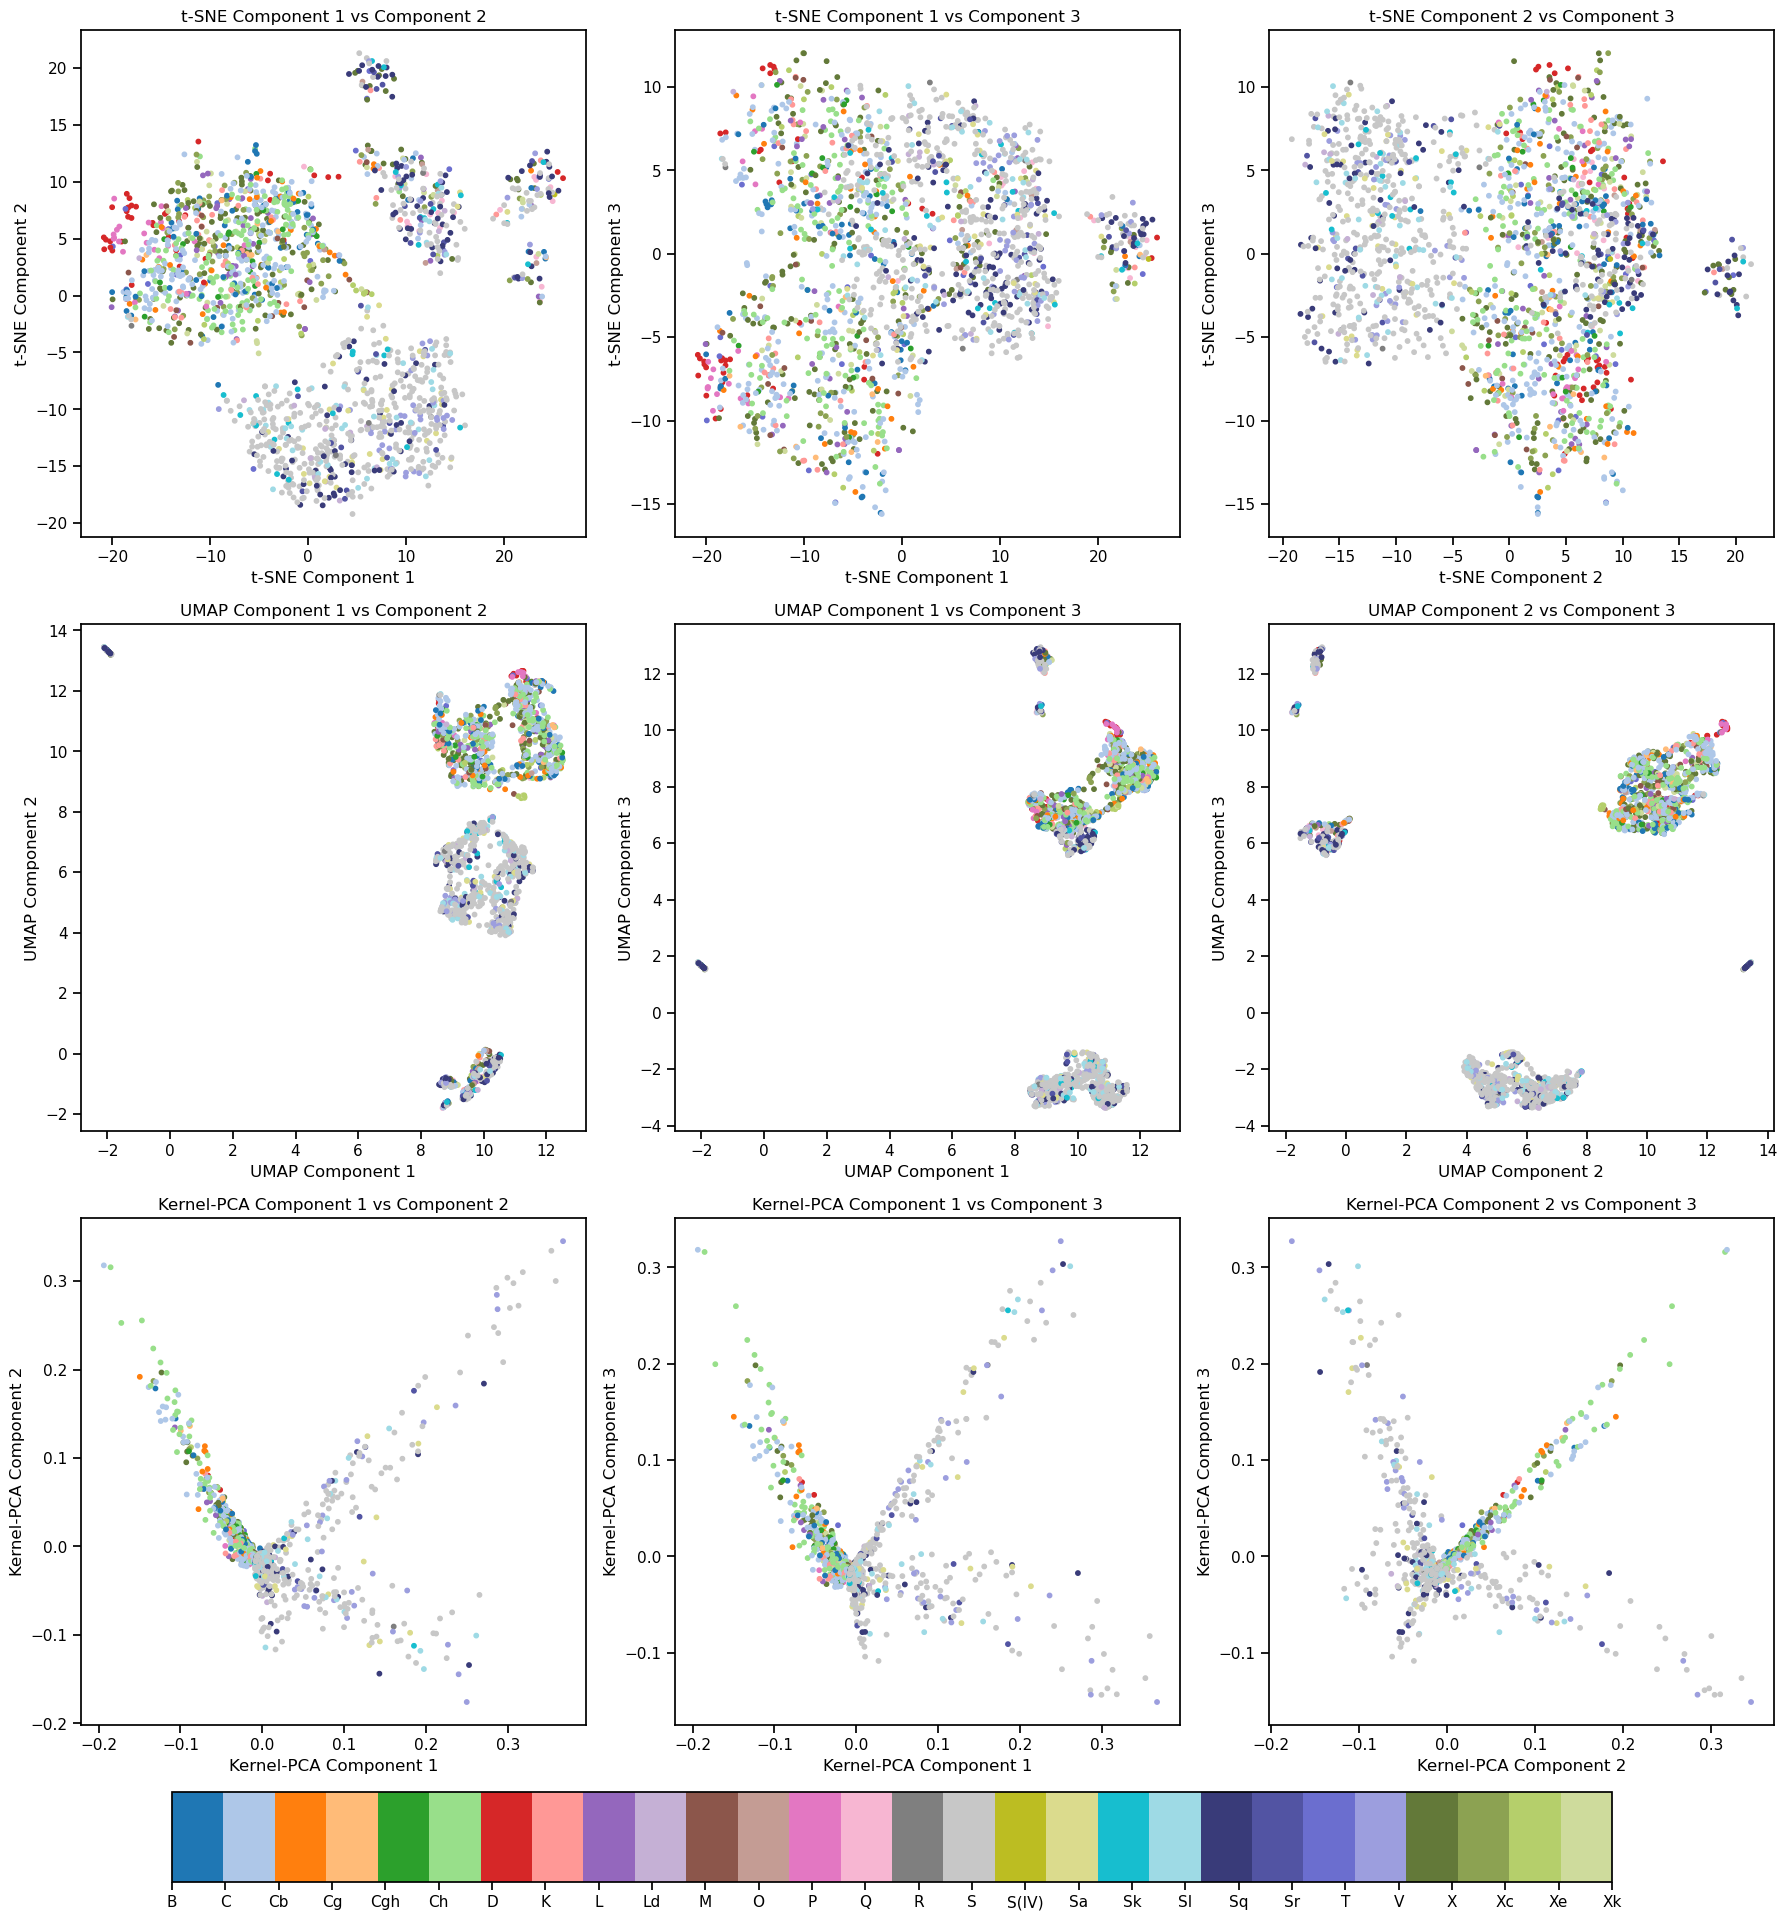

In [52]:
# Sort the unique specs alphabetically
unique_specs = np.sort(df['spec'].unique())
num_specs = len(unique_specs)

# Map each sorted spec to a specific colour
colours = sns.color_palette("tab20", 20) + sns.color_palette("tab20b", num_specs - 20)
spec_to_colour = {spec_name: colours[i] for i, spec_name in enumerate(unique_specs)}

# Create a colourmap for the colours
cmap = mpl.colors.ListedColormap(colours)

# Order the spec coloumn so the colours align with the colourmap
df['spec'] = pd.Categorical(df['spec'], categories=unique_specs, ordered=True)

# Plotting the results in 2D for each technique
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# t-SNE 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[0, i].scatter(tsne_results[:, comp1], tsne_results[:, comp2], 
                                  c=df['spec'].cat.codes, cmap=cmap, s=10)
    axes[0, i].set_title(f't-SNE Component {comp1+1} vs Component {comp2+1}')
    axes[0, i].set_xlabel(f't-SNE Component {comp1+1}')
    axes[0, i].set_ylabel(f't-SNE Component {comp2+1}')

# UMAP 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[1, i].scatter(umap_results[:, comp1], umap_results[:, comp2], 
                                  c=df['spec'].cat.codes, cmap=cmap, s=10)
    axes[1, i].set_title(f'UMAP Component {comp1+1} vs Component {comp2+1}')
    axes[1, i].set_xlabel(f'UMAP Component {comp1+1}')
    axes[1, i].set_ylabel(f'UMAP Component {comp2+1}')

# Kernel-PCA 2D Plots
for i, (comp1, comp2) in enumerate([(0, 1), (0, 2), (1, 2)]):
    scatter = axes[2, i].scatter(kpca_results[:, comp1], kpca_results[:, comp2], 
                                  c=df['spec'].cat.codes, cmap=cmap, s=10)
    axes[2, i].set_title(f'Kernel-PCA Component {comp1+1} vs Component {comp2+1}')
    axes[2, i].set_xlabel(f'Kernel-PCA Component {comp1+1}')
    axes[2, i].set_ylabel(f'Kernel-PCA Component {comp2+1}')

# Avoid overlapping subplots
plt.tight_layout()

# Plot the custom colourbar below the subplots
cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.05])
cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, orientation='horizontal')

# Set the ticks based on the number of unique specs
ticks = np.linspace(0, 1, num_specs)
cbar.set_ticks(ticks)

# Set the correct labels based on the sorted specs
cbar.set_ticklabels(unique_specs)

# Show the plot
plt.show()

Although, the clustering does seem to be able to sperate some classes from each other the same is not true for the specs.